In [99]:
# settings
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime

#stocks = ["META", "AMZN"]
stocks = ["META", "AMZN", "AAPL", "NFLX", "GOOG"]

[*********************100%%**********************]  5 of 5 completed


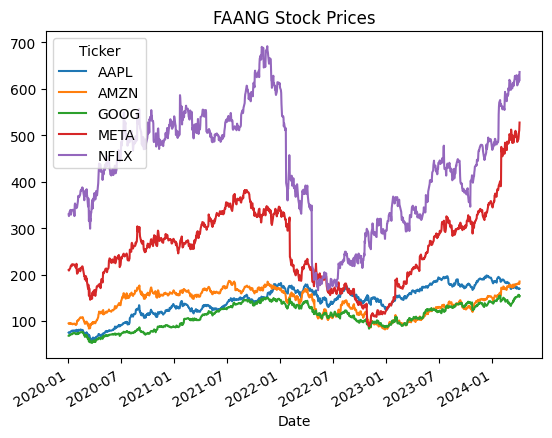

Price        Adj Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        NFLX   
Date                                                                     
2024-04-05  169.580002  185.070007  153.940002  527.340027  636.179993   
2024-04-04  168.820007  180.000000  151.940002  510.920013  617.140015   
2024-04-03  169.649994  182.410004  156.369995  506.739990  630.080017   
2024-04-02  168.839996  180.690002  155.869995  497.369995  614.210022   
2024-04-01  170.029999  180.970001  156.500000  491.350006  614.309998   

Price            Close                                                  ...  \
Ticker            AAPL        AMZN        GOOG        META        NFLX  ...   
Date                                                                    ...   
2024-04-05  169.580002  185.070007  153.940002  527.340027  636.179993  ...   
2024-04-04  168.820007  180.000000  151.940002  510.920013  617.140015  ...   
2024-04-03  

In [100]:
data = yf.download(stocks, start="2020-01-01")

data['Close'].plot()
plt.title("FAANG Stock Prices")
plt.show()

print(data.sort_values('Date', ascending=False).head())

In [101]:
data_close = data['Close'].reset_index()
data = data.stack(future_stack=True).reset_index().sort_values(['Date','Ticker'])

In [102]:
print(type(stocks))

<class 'list'>


In [103]:
def calc_growth(df,stock):
    df[str(stock) + "_gr"] = df[stock].pct_change() * 100

for s in stocks:
    calc_growth(data_close, s)

print(data_close.head())

Ticker       Date       AAPL       AMZN       GOOG        META        NFLX  \
0      2020-01-02  75.087502  94.900497  68.368500  209.779999  329.809998   
1      2020-01-03  74.357498  93.748497  68.032997  208.669998  325.899994   
2      2020-01-06  74.949997  95.143997  69.710503  212.600006  335.829987   
3      2020-01-07  74.597504  95.343002  69.667000  213.059998  330.750000   
4      2020-01-08  75.797501  94.598503  70.216003  215.220001  339.260010   

Ticker   META_gr   AMZN_gr   AAPL_gr   NFLX_gr   GOOG_gr  
0            NaN       NaN       NaN       NaN       NaN  
1      -0.529126 -1.213903 -0.972204 -1.185532 -0.490727  
2       1.883360  1.488557  0.796825  3.046945  2.465723  
3       0.216365  0.209162 -0.470305 -1.512666 -0.062405  
4       1.013801 -0.780864  1.608629  2.572943  0.788040  


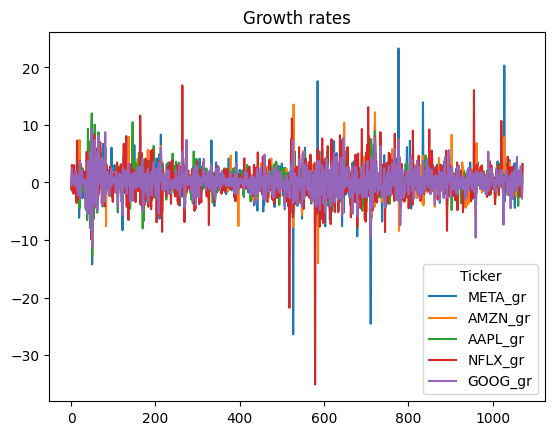

In [111]:
data_close[["META_gr","AMZN_gr","AAPL_gr","NFLX_gr","GOOG_gr"]].plot()
plt.title("Growth rates")
plt.show()